In [24]:
import random
import numpy as np
import timeit
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import pandas as pd
import time
from scipy.stats import linregress

In [2]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1
latitudes

[6.1190611617950665,
 -16.427817209836522,
 4.938816774178951,
 -50.44093999034326,
 -81.3413646343606,
 -8.857347136020719,
 -49.6039242108555,
 89.4457072271716,
 -25.002695326757436,
 -27.265150047216473]

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
coordinates = list(lat_lngs)
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cape town za
ust-kuyga ru
port hawkesbury ca
tapayan ph
bambous virieux mu
mataura pf
bandarbeyla so
bluff nz
calamar co
wajid so
rio grande br
busselton au
rikitea pf
qaqortoq gl
attawapiskat ca
butaritari ki
mataura pf
minab ir
chokurdakh ru
ushuaia ar
rikitea pf
ushuaia ar
illoqqortoormiut gl
nagram in
orodara bf
ballina au
kapaa us
marquette us
khandyga ru
butaritari ki
balaipungut id
grand river south east mu
capinota bo
taolanaro mg
ushuaia ar
mahebourg mu
jalu ly
acapulco mx
butaritari ki
kapaa us
east london za
albany au
nanortalik gl
punta arenas cl
hilo us
rikitea pf
albany au
waingapu id
upernavik gl
vangaindrano mg
busselton au
nakanojo jp
puerto narino co
rawannawi ki
kosh-agach ru
leningradskiy ru
barrow us
chapleau ca
khudumelapye bw
puerto ayora ec
vaini to
thayetmyo mm
saint-francois gp
castro cl
coquimbo cl
qaanaaq gl
rikitea pf
taolanaro mg
ziro in
gat ly
lata sb
murmashi ru
jamestown sh
busselton au
mataura pf
rikitea pf
airai pw
kapaa us
luderitz na
alta floresta b

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [10]:
# Make a 'Get' request for the city weather.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=boston"
city_weather = requests.get(city_url)
boston_data = city_weather.json()
boston_data.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [11]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-01-31 21:21:01'

In [12]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

 mile house
City not found. Skipping...
Processing Record 12 of Set 4 | bredasdorp
Processing Record 13 of Set 4 | general roca
Processing Record 14 of Set 4 | rabat
Processing Record 15 of Set 4 | panjakent
Processing Record 16 of Set 4 | salalah
Processing Record 17 of Set 4 | farah
Processing Record 18 of Set 4 | buraydah
Processing Record 19 of Set 4 | birao
Processing Record 20 of Set 4 | kuito
Processing Record 21 of Set 4 | santa comba
Processing Record 22 of Set 4 | jiran
Processing Record 23 of Set 4 | dawei
Processing Record 24 of Set 4 | bengkulu
Processing Record 25 of Set 4 | lorengau
Processing Record 26 of Set 4 | iskateley
Processing Record 27 of Set 4 | kabinda
Processing Record 28 of Set 4 | udachnyy
Processing Record 29 of Set 4 | songjianghe
Processing Record 30 of Set 4 | tokmak
Processing Record 31 of Set 4 | krasnaya gora
Processing Record 32 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 4 | mar del plata
Processing Record 34 of Set 

In [14]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,68.00,88,75,17.27,ZA,2021-01-31 21:20:23
1,Ust-Kuyga,70.0167,135.6000,-38.15,80,93,4.52,RU,2021-01-31 21:24:29
2,Port Hawkesbury,45.6169,-61.3485,32.00,80,75,5.75,CA,2021-01-31 21:24:30
3,Tapayan,7.2944,124.2661,74.48,85,100,2.37,PH,2021-01-31 21:24:30
4,Bambous Virieux,-20.3428,57.7575,81.00,74,40,14.97,MU,2021-01-31 21:23:21
5,Mataura,-46.1927,168.8643,64.99,55,63,2.19,NZ,2021-01-31 21:24:30
6,Bandarbeyla,9.4942,50.8122,73.09,70,19,17.67,SO,2021-01-31 21:24:30
7,Bluff,-46.6000,168.3333,58.53,75,49,2.62,NZ,2021-01-31 21:24:30
8,Calamar,10.2511,-74.9146,87.80,66,0,13.80,CO,2021-01-31 21:24:30
9,Wajid,3.8093,43.2471,76.03,33,12,10.92,SO,2021-01-31 21:24:30


In [15]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-01-31 21:20:23,-33.9258,18.4232,68.00,88,75,17.27
1,Ust-Kuyga,RU,2021-01-31 21:24:29,70.0167,135.6000,-38.15,80,93,4.52
2,Port Hawkesbury,CA,2021-01-31 21:24:30,45.6169,-61.3485,32.00,80,75,5.75
3,Tapayan,PH,2021-01-31 21:24:30,7.2944,124.2661,74.48,85,100,2.37
4,Bambous Virieux,MU,2021-01-31 21:23:21,-20.3428,57.7575,81.00,74,40,14.97
5,Mataura,NZ,2021-01-31 21:24:30,-46.1927,168.8643,64.99,55,63,2.19
6,Bandarbeyla,SO,2021-01-31 21:24:30,9.4942,50.8122,73.09,70,19,17.67
7,Bluff,NZ,2021-01-31 21:24:30,-46.6000,168.3333,58.53,75,49,2.62
8,Calamar,CO,2021-01-31 21:24:30,10.2511,-74.9146,87.80,66,0,13.80
9,Wajid,SO,2021-01-31 21:24:30,3.8093,43.2471,76.03,33,12,10.92


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/31/21'

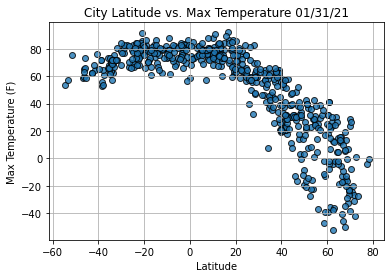

In [19]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

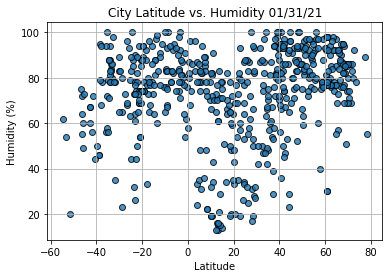

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

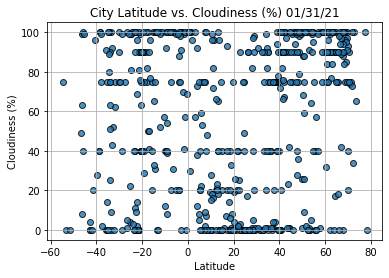

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

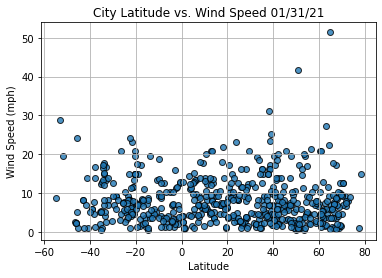

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [26]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [27]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

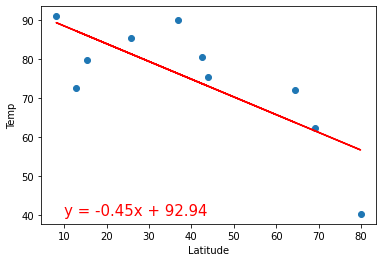

In [28]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [29]:
## REFERENCE CODE FOR LINREGRESS
## Perform linear regression.
#(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

## Calculate the regression line "y values" from the slope and intercept.
#regress_values = x_values * slope + intercept

## Get the equation of the line.
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

## Create a scatter plot of the x and y values.
#plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
#plt.plot(x_values,regress_values,"r")
## Annotate the text for the line equation and add its coordinates.
#plt.annotate(line_eq, (10,40), fontsize=15, color="red")
#plt.xlabel('Latitude')
#plt.ylabel('Temp')
#plt.show()

NameError: name 'x_values' is not defined

In [45]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.title(title)
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

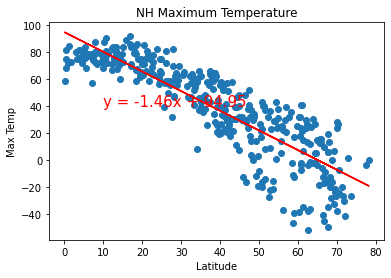

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'NH Maximum Temperature', 'Max Temp',(10,40))

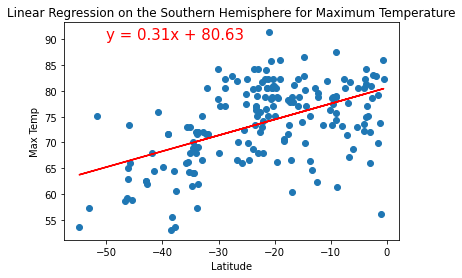

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

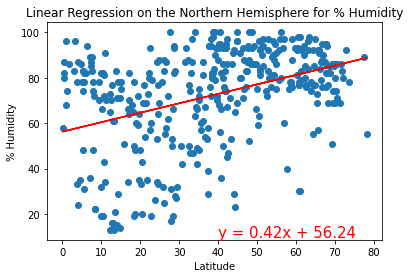

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

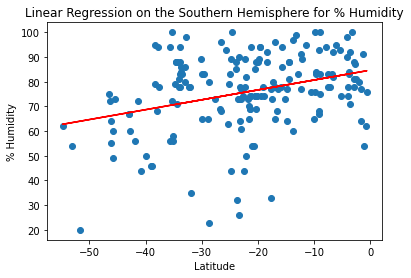

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

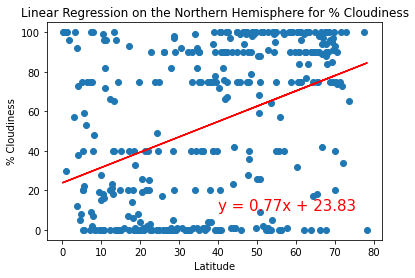

In [51]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

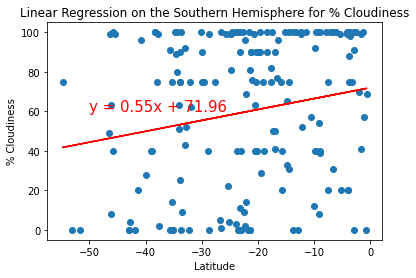

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

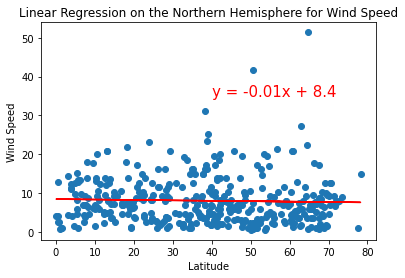

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

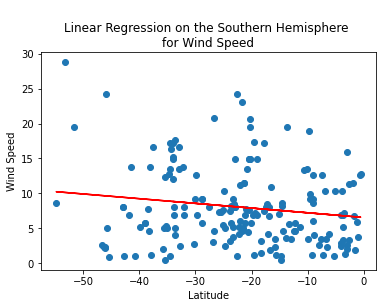

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))